In [1]:
from dotenv import load_dotenv
import os
from pyoso import Client

load_dotenv()
OSO_API_KEY = os.environ['OSO_API_KEY']
client = Client(api_key=OSO_API_KEY)

In [2]:
df_events = client.to_pandas("""

SELECT
  DATE(time) AS time,
  event_source AS chain,
  count(*) AS events
FROM int_events__4337 AS e
JOIN int_4337_address_labels AS lbl
ON e.to_artifact_name = lbl.address
WHERE
  lbl.project_label = 'alchemy'
  AND time BETWEEN DATE('2024-04-11') AND DATE('2025-04-12')
GROUP BY 1,2
ORDER BY 1

""")

df_events.tail()

,time,chain,events
1258,2025-04-11,OPTIMISM,309
1259,2025-04-11,INK,48
1260,2025-04-11,WORLDCHAIN,426483
1261,2025-04-11,RACE,46
1262,2025-04-11,ZORA,24


<Axes: xlabel='time'>

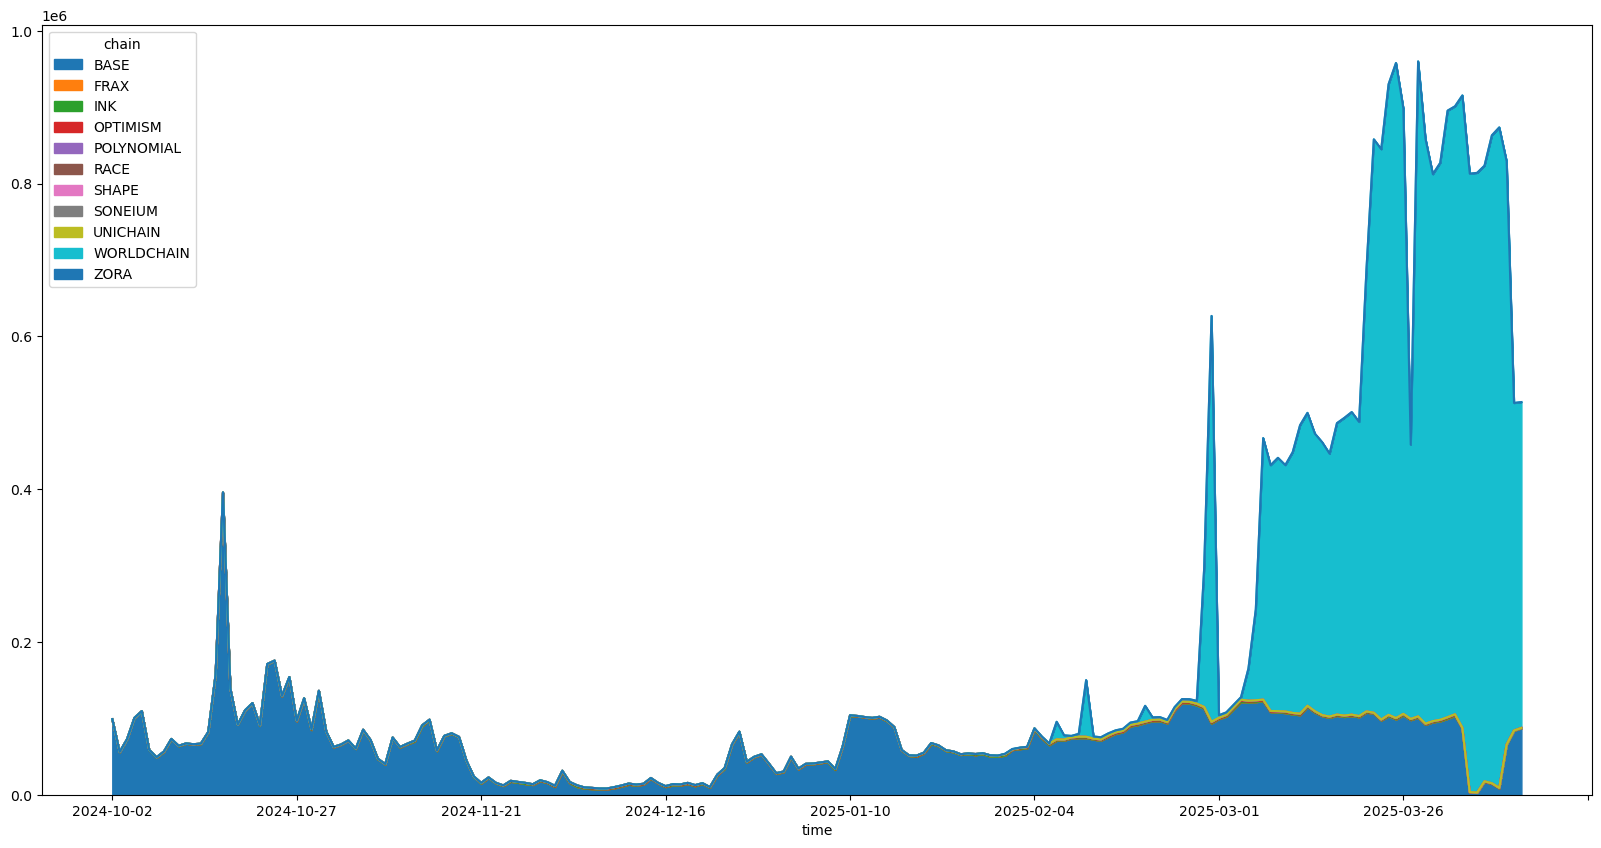

In [3]:
(
    df_events.pivot_table(
        index='time',
        columns='chain',
        values='events',
        aggfunc='sum',
        fill_value=0
    ).plot(
        kind='area',
        figsize=(20,10)
    )
)